In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
train_df = pd.read_csv('Training.csv')
test_df = pd.read_csv('Testing.csv')

In [42]:
train_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [43]:
test_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [44]:
train_df.drop(columns=['Unnamed: 133'], inplace=True)

In [45]:
train_df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [46]:
train_df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [47]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [48]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [49]:
train_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
train_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [51]:
test_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

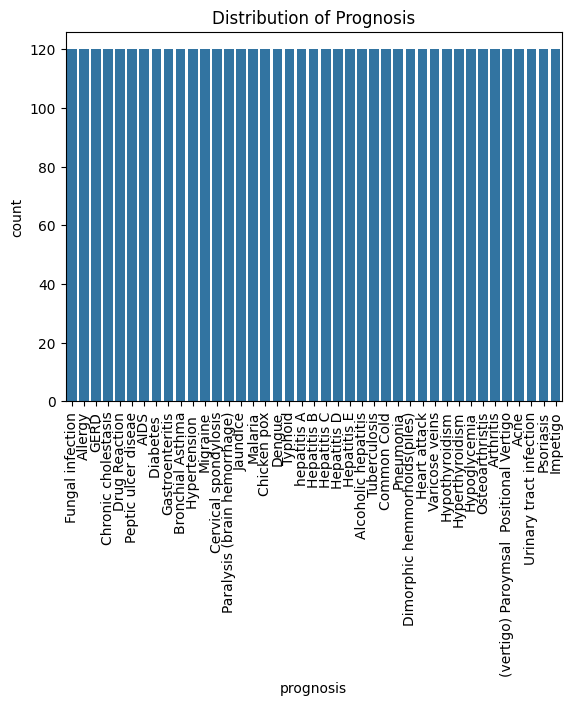

In [52]:
sns.countplot(x='prognosis', data=train_df)
plt.title('Distribution of Prognosis')
plt.xticks(rotation=90)
plt.show()

In [53]:
numeric_df = train_df.drop(columns=['prognosis'])

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                       itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
small_dents_in_nails -0.061573   0.331087             -0.023073   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.0947

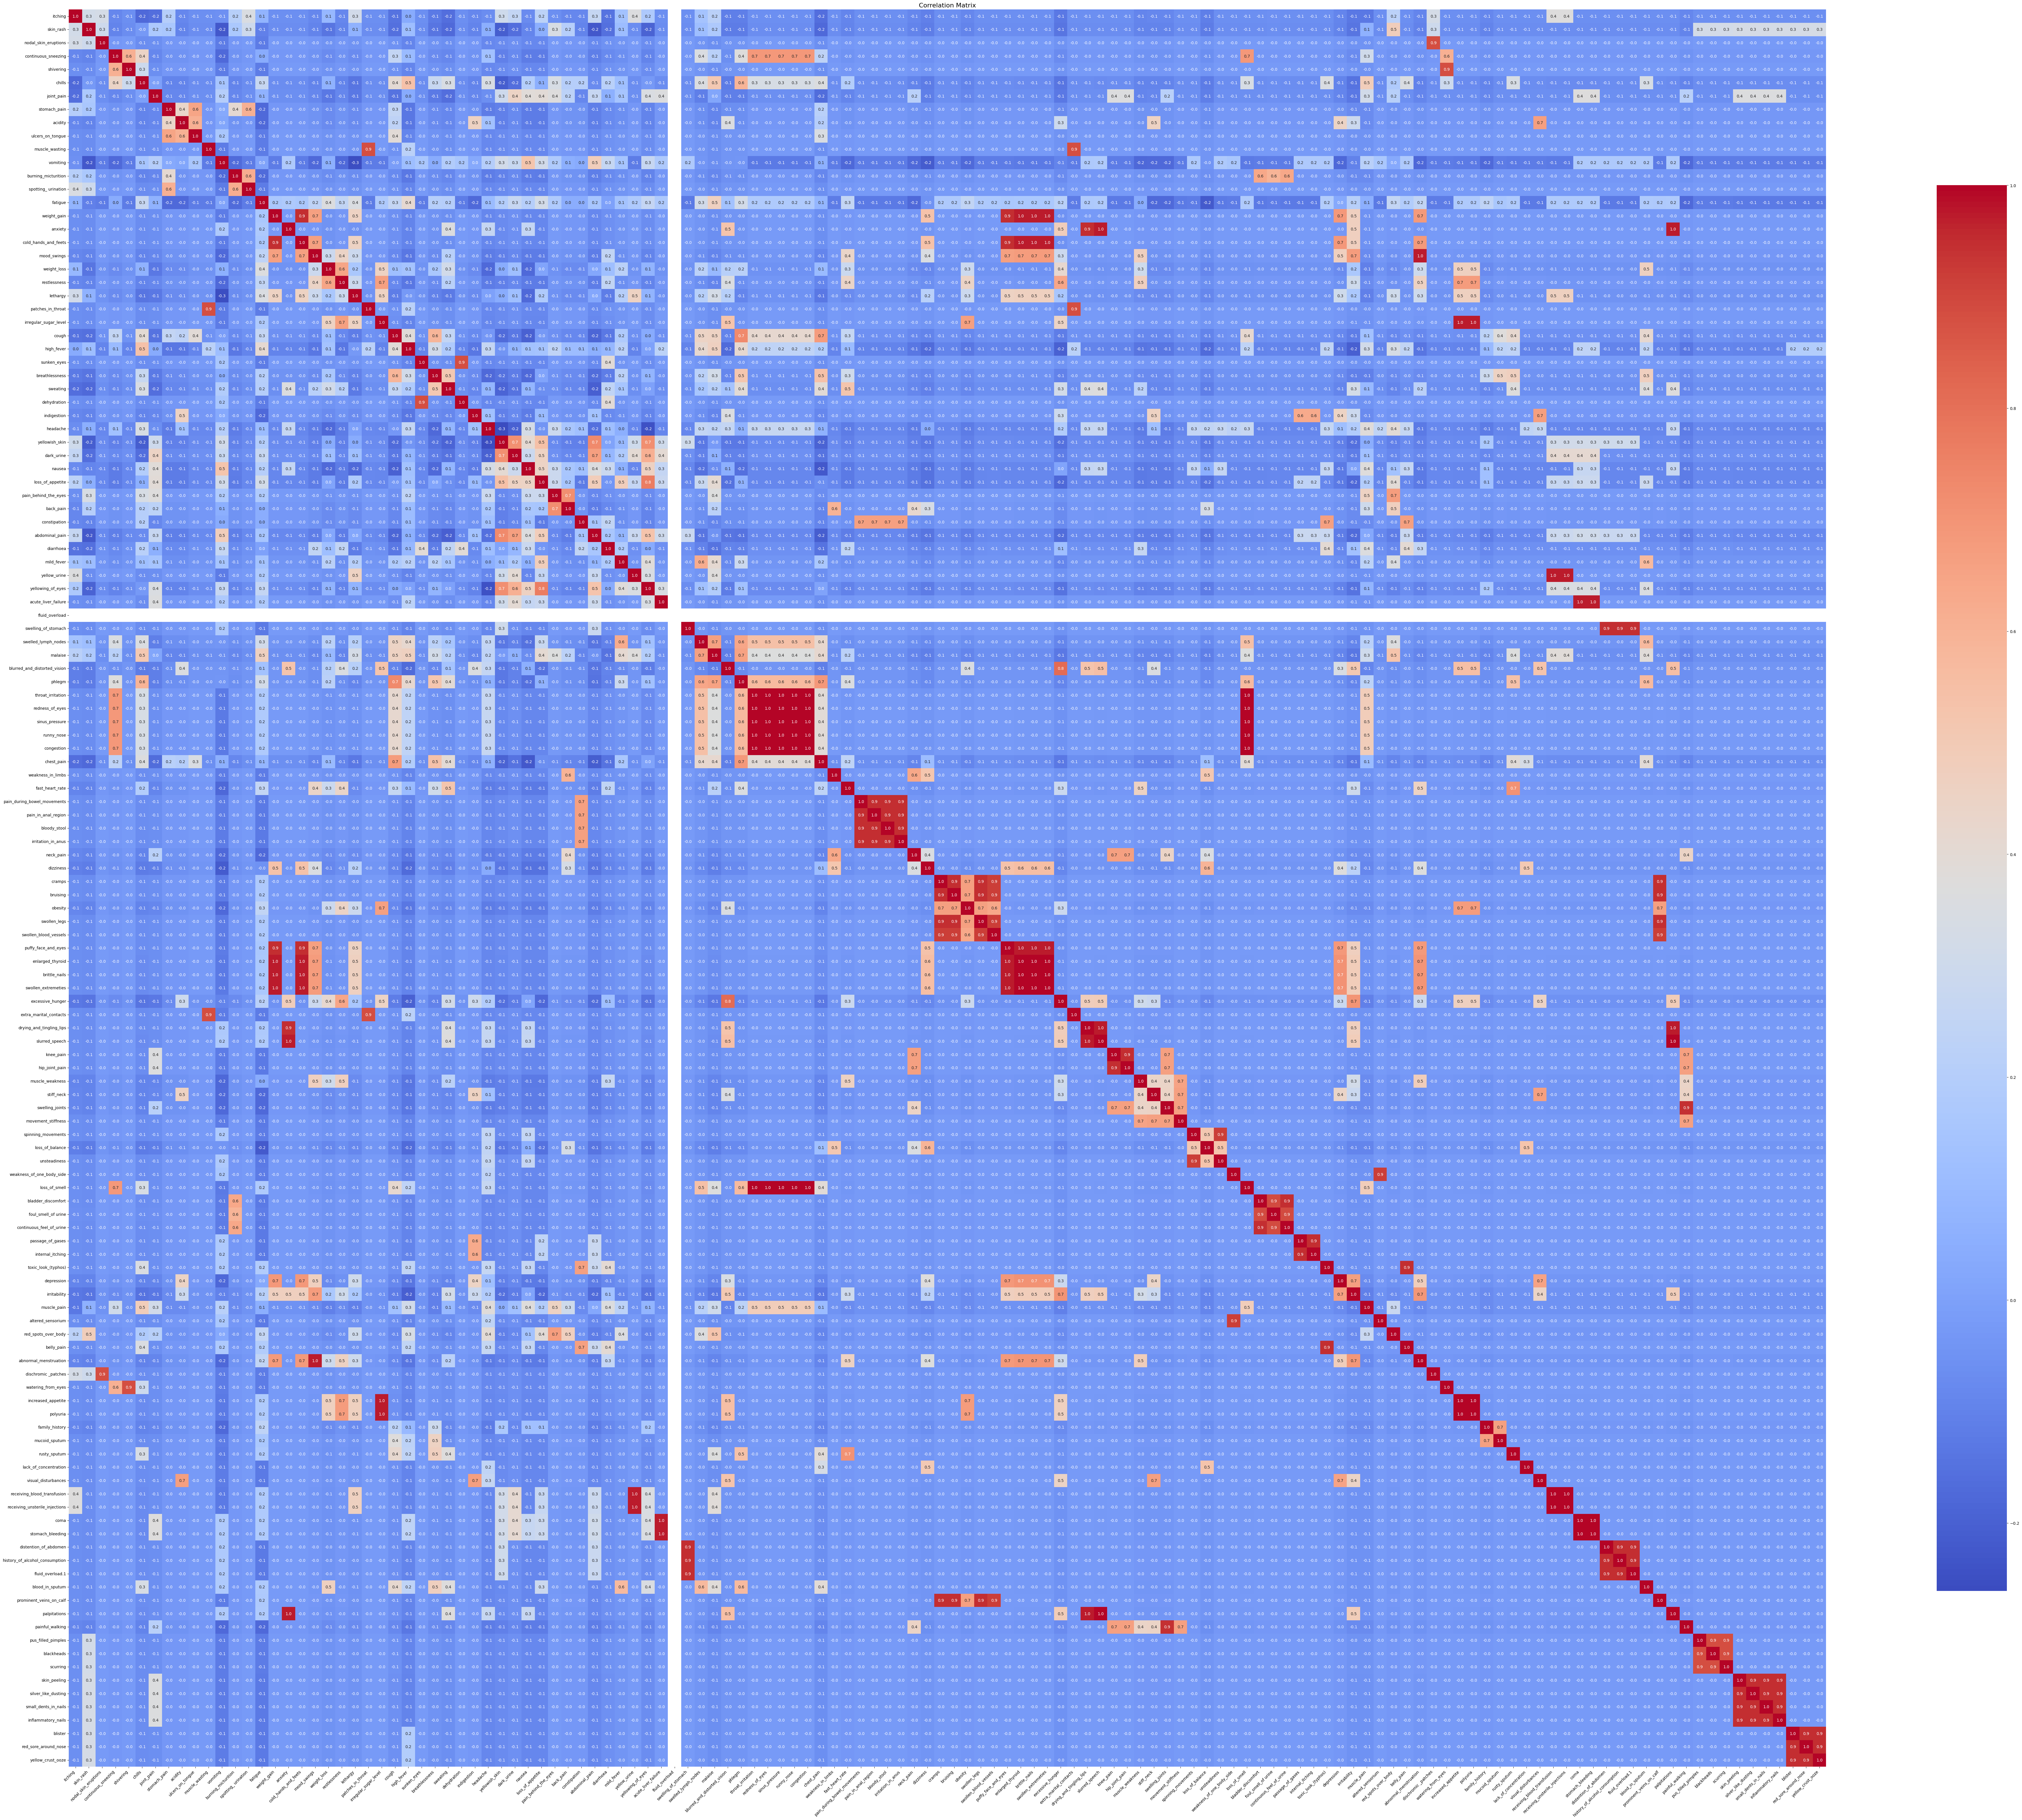

In [60]:
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [15]:
correlation_series = correlation_matrix.unstack()
strongest_correlations = correlation_series[correlation_series != 1].abs().sort_values(ascending=False)


strongest_pair = strongest_correlations.idxmax()
strongest_value = strongest_correlations.max()

print(f'Strongest correlation: {strongest_pair} with a correlation coefficient of {strongest_value}')

Strongest correlation: ('palpitations', 'anxiety') with a correlation coefficient of 0.9740708303413301


In [16]:
correlated_features = set()
threshold = 0.9  # Set your correlation threshold

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove correlated features from your dataset
train_df_reduced = train_df.drop(columns=correlated_features)
print("Removed features:", correlated_features)

Removed features: {'silver_like_dusting', 'cold_hands_and_feets', 'swollen_legs', 'swollen_blood_vessels', 'inflammatory_nails', 'brittle_nails', 'receiving_blood_transfusion', 'yellow_crust_ooze', 'history_of_alcohol_consumption', 'runny_nose', 'loss_of_smell', 'slurred_speech', 'palpitations', 'prominent_veins_on_calf', 'altered_sensorium', 'congestion', 'enlarged_thyroid', 'swollen_extremeties', 'bloody_stool', 'continuous_feel_of_urine', 'increased_appetite', 'distention_of_abdomen', 'small_dents_in_nails', 'red_sore_around_nose', 'sinus_pressure', 'hip_joint_pain', 'polyuria', 'painful_walking', 'pain_in_anal_region', 'puffy_face_and_eyes', 'stomach_bleeding', 'coma', 'fluid_overload.1', 'receiving_unsterile_injections', 'abnormal_menstruation', 'drying_and_tingling_lips', 'unsteadiness', 'internal_itching', 'redness_of_eyes', 'irritation_in_anus', 'bruising', 'belly_pain'}


In [17]:
label_encoder = LabelEncoder()
train_df['prognosis'] = label_encoder.fit_transform(train_df['prognosis'])

In [18]:
from sklearn.model_selection import train_test_split

X = train_df_reduced.drop(columns=['prognosis'])  
y = train_df_reduced['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy_without_reg = accuracy_score(y_test, y_pred)
print("Accuracy without regularization:", accuracy_without_reg)

Accuracy without regularization: 1.0


In [21]:
from sklearn.linear_model import LogisticRegression


model_ridge = LogisticRegression(penalty='l2', solver='liblinear')  
model_ridge.fit(X_train, y_train)


y_val_pred_ridge = model_ridge.predict(X_test)
accuracy_with_reg = accuracy_score(y_test, y_val_pred_ridge)
print("Accuracy with L2 regularization:", accuracy_with_reg)

Accuracy with L2 regularization: 1.0


In [22]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_ridge, X, y, cv=5)
print("Cross-validated accuracy with regularization:", cv_scores.mean())

Cross-validated accuracy with regularization: 0.999390243902439


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [25]:
conf_matrix

array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 30,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 34]], dtype=int64)

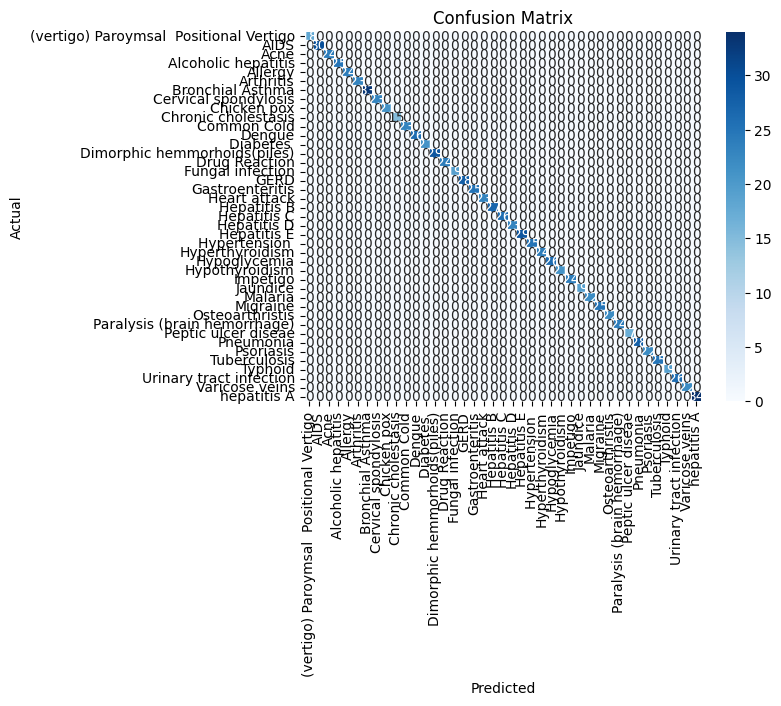

In [26]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
label_encoder = LabelEncoder()
test_df['prognosis'] = label_encoder.fit_transform(test_df['prognosis'])

In [28]:
X_test = test_df.drop(columns=['prognosis'])


In [29]:
print("Scaler feature names:", scaler.feature_names_in_)
print("Test columns:", X_test.columns)

Scaler feature names: ['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety' 'mood_swings'
 'weight_loss' 'restlessness' 'lethargy' 'patches_in_throat'
 'irregular_sugar_level' 'cough' 'high_fever' 'sunken_eyes'
 'breathlessness' 'sweating' 'dehydration' 'indigestion' 'headache'
 'yellowish_skin' 'dark_urine' 'nausea' 'loss_of_appetite'
 'pain_behind_the_eyes' 'back_pain' 'constipation' 'abdominal_pain'
 'diarrhoea' 'mild_fever' 'yellow_urine' 'yellowing_of_eyes'
 'acute_liver_failure' 'fluid_overload' 'swelling_of_stomach'
 'swelled_lymph_nodes' 'malaise' 'blurred_and_distorted_vision' 'phlegm'
 'throat_irritation' 'chest_pain' 'weakness_in_limbs' 'fast_heart_rate'
 'pain_during_bowel_movements' 'neck_pain' 'dizziness' 'cramps' 'obesity'
 'excessive_hunger' 'extra_marital_contacts' 'knee_

In [30]:
scaler_features = set(scaler.feature_names_in_)
# الأعمدة في مجموعة الاختبار
test_columns = set(X_test.columns)

# الميزات المشتركة
common_features = list(scaler_features.intersection(test_columns))

In [31]:
X_test_aligned = X_test[common_features]

In [32]:
print("Aligned test shape:", X_test_aligned.shape)

Aligned test shape: (42, 90)


In [33]:
predictions = model.predict(X_test_aligned)

c:\Users\mridu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [34]:
predictions = model.predict(X_test_aligned.to_numpy())

In [35]:
predictions = model.predict(X_test_aligned.values)


In [36]:
print(predictions)

['Dimorphic hemmorhoids(piles)' 'Paralysis (brain hemorrhage)'
 'Dimorphic hemmorhoids(piles)' 'Varicose veins'
 'Dimorphic hemmorhoids(piles)' 'Impetigo' 'Dimorphic hemmorhoids(piles)'
 'Allergy' 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles)' 'Alcoholic hepatitis'
 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)' 'Jaundice'
 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles)' 'Varicose veins' 'Jaundice' 'Jaundice'
 'Alcoholic hepatitis' 'Jaundice' 'Jaundice' 'Varicose veins'
 'Dimorphic hemmorhoids(piles)' 'Paralysis (brain hemorrhage)'
 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles)' 'Allergy' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles)' 'Dimorphic hemmorhoids(piles)'
 'Dimorphic hemmorhoids(piles